<a href="https://colab.research.google.com/github/shahpranshu27/HandsOn_ML/blob/main/GBM_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ross_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/store.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/test.csv')
submission_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rossmann-store-sales/sample_submission.csv')

In [3]:
ross_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [4]:
store_df

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

In [5]:
submission_df

Id  Sales
0          1      0
1          2      0
2          3      0
3          4      0
4          5      0
...      ...    ...
41083  41084      0
41084  41085      0
41085  41086      0
41086  41087      0
41087  41088      0

[41088 rows x 2 columns]

In [6]:
test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

## Pre-processing

In [7]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [8]:
merged_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        NaN                       NaN       0   
1017207                        NaN                       NaN       0   
1017208                        NaN                       NaN       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    NaN              NaN               NaN  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    NaN              NaN               NaN  
4                    NaN              NaN               NaN  
...                  ...              ...               ...  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              NaN              NaN               NaN  
1017206              NaN              NaN               NaN  
1017207              NaN              NaN               NaN  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  

[1017209 rows x 18 columns]

In [9]:
merged_test_df

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
...              ...       ...        ...                  ...   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
...                          ...                       ...     ...   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        NaN                       NaN       0   
41086                        NaN                       NaN       0   
41087                        NaN                       NaN       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                  NaN              NaN               NaN  
1                 14.0           2011.0   Jan,Apr,Jul,Oct  
2                  NaN              NaN               NaN  
3                  NaN              NaN               NaN  
4                  NaN              NaN               NaN  
...                ...              ...               ...  
41083             31.0           2013.0   Jan,Apr,Jul,Oct  
41084              NaN              NaN               NaN  
41085              NaN              NaN               NaN  
41086              NaN              NaN               NaN  
41087             22.0           2012.0  Mar,Jun,Sept,Dec  

[41088 rows x 17 columns]

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
merged_df.Date = pd.to_datetime(merged_df.Date)
merged_test_df.Date = pd.to_datetime(merged_test_df.Date)

In [12]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [13]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Exploratory Data Analysis & Visaulization

<Axes: xlabel='Sales', ylabel='Count'>

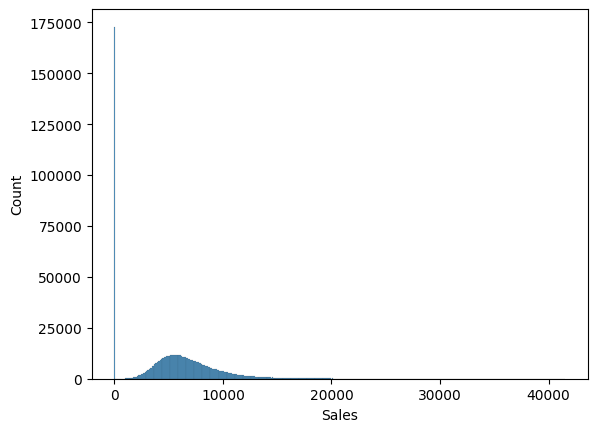

In [14]:
sns.histplot(merged_df.Sales)

In [15]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [16]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [17]:
merged_df.Open.value_counts()

Open
1    844392
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

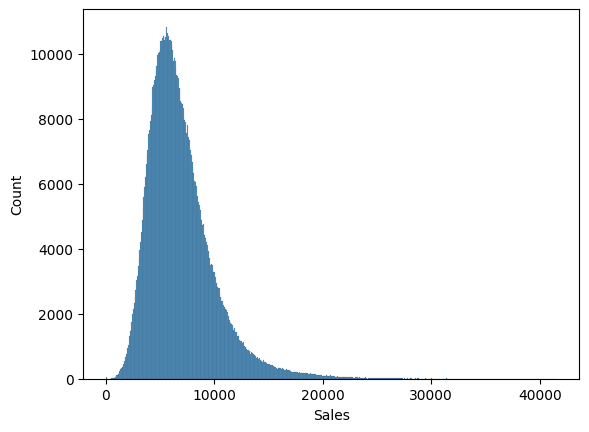

In [18]:
sns.histplot(merged_df.Sales)

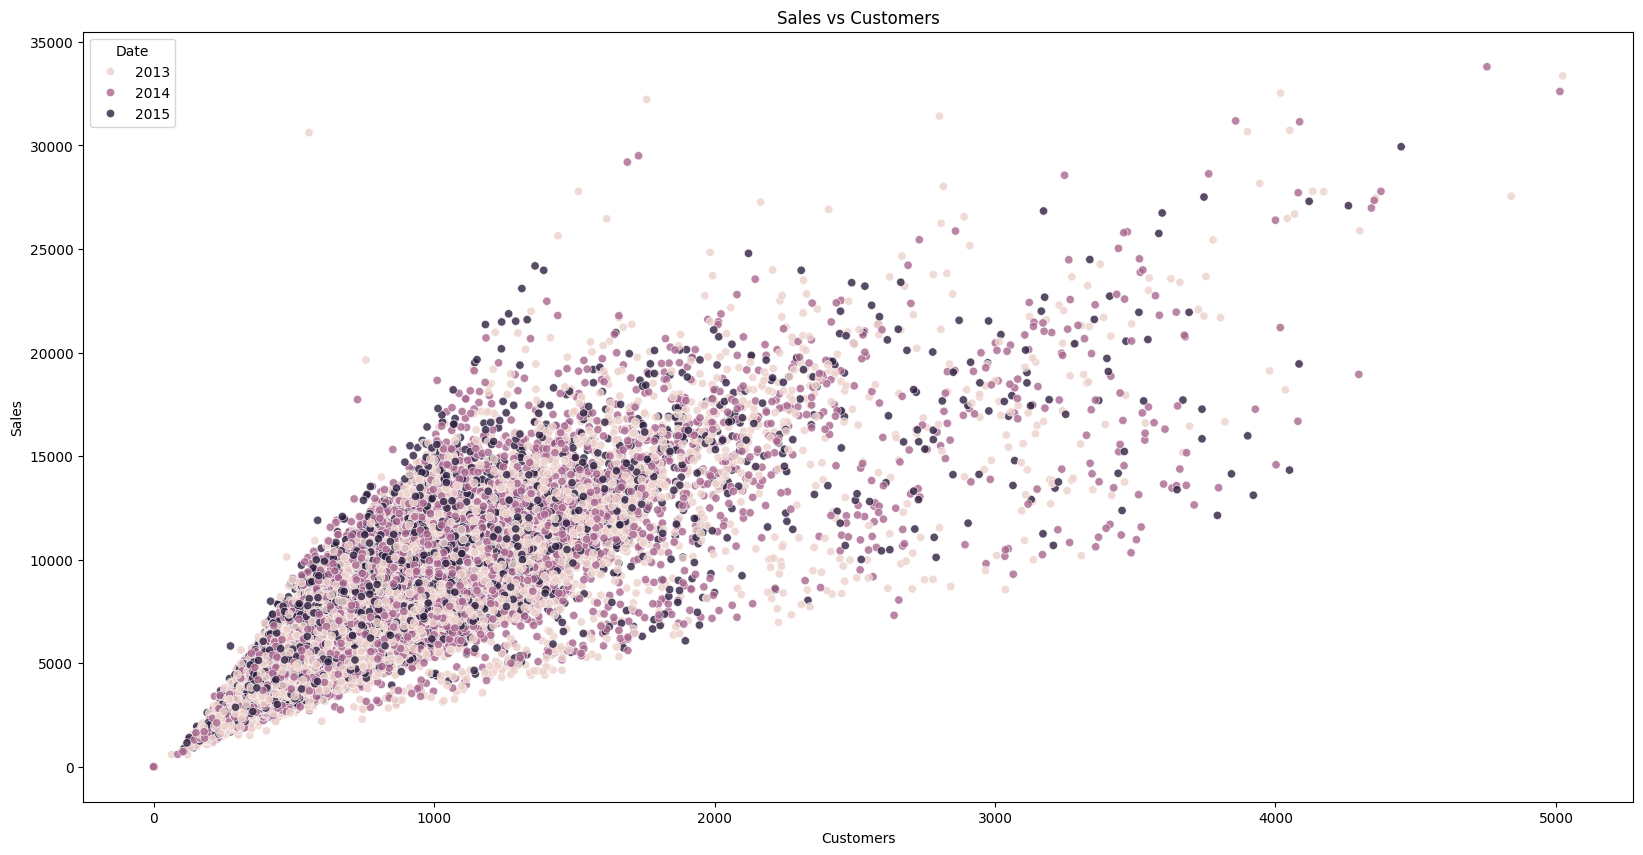

In [19]:
plt.figure(figsize=(20, 10))
temp_df = merged_df.sample(50000)
sns.scatterplot(data=temp_df, x='Customers', y='Sales', hue=temp_df.Date.dt.year, alpha=0.8)
plt.title('Sales vs Customers')
plt.show()

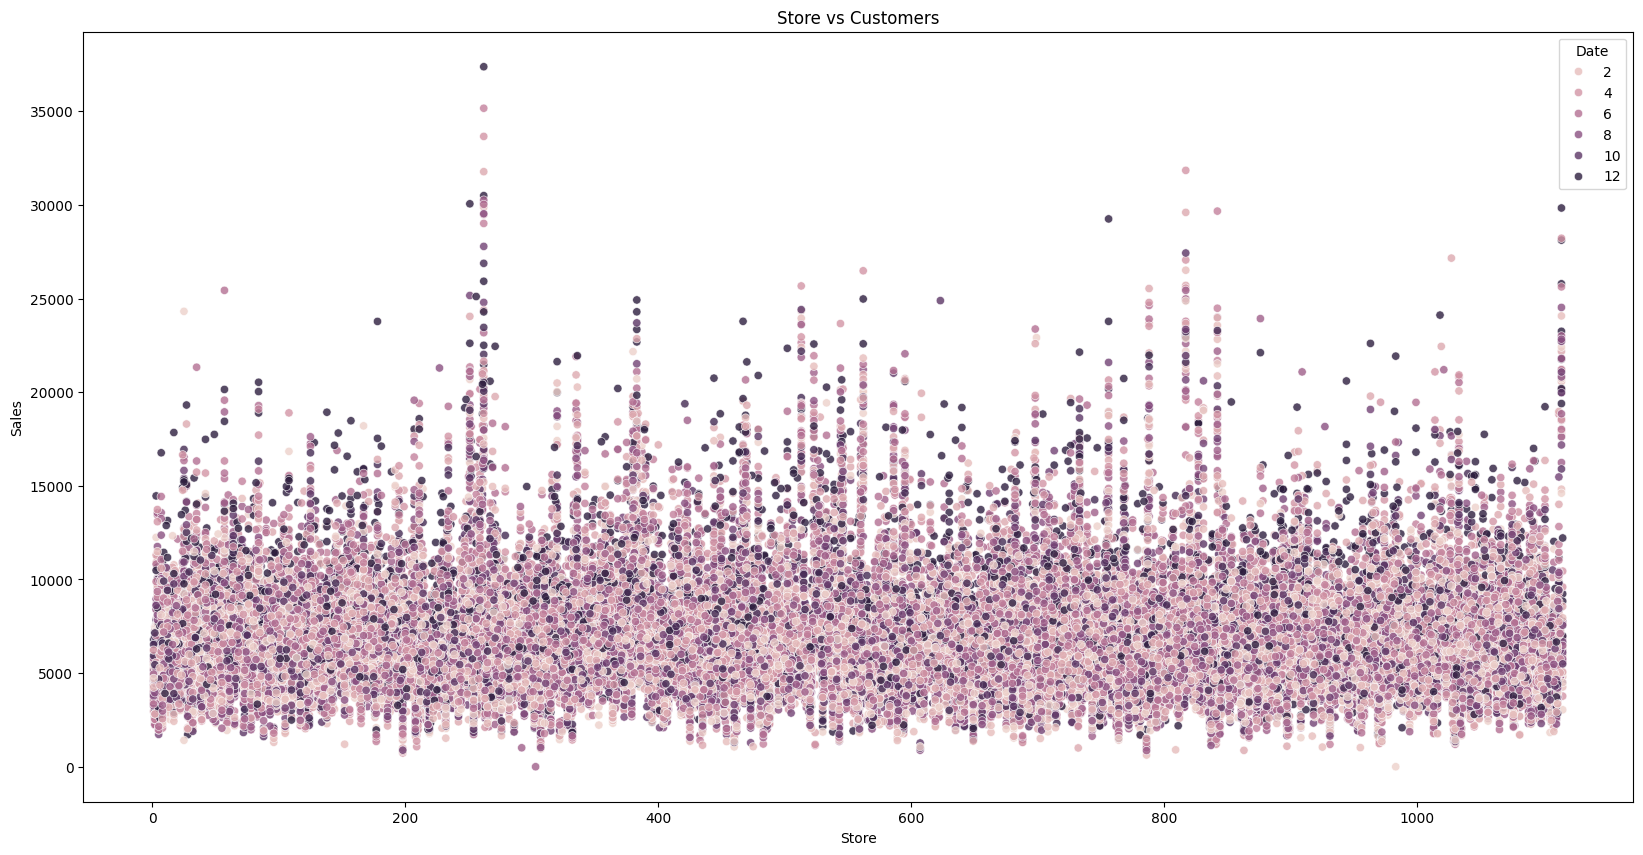

In [20]:
plt.figure(figsize=(20, 10))
temp_df = merged_df.sample(50000)
sns.scatterplot(data=temp_df, x='Store', y='Sales', hue=temp_df.Date.dt.month, alpha=0.8)
plt.title('Store vs Customers')
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

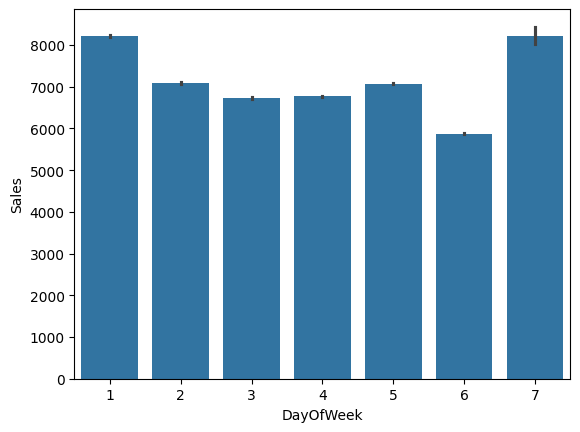

In [21]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

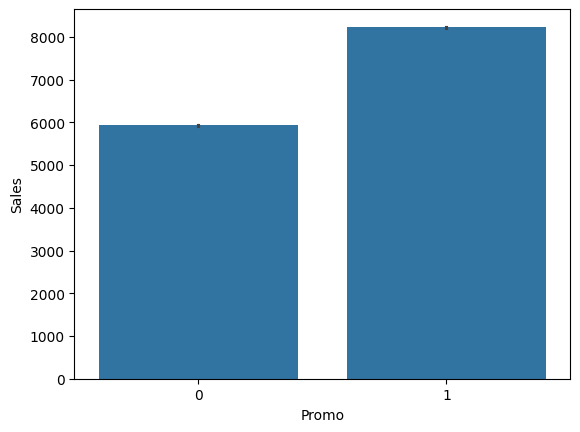

In [22]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

<Axes: xlabel='StateHoliday', ylabel='Sales'>

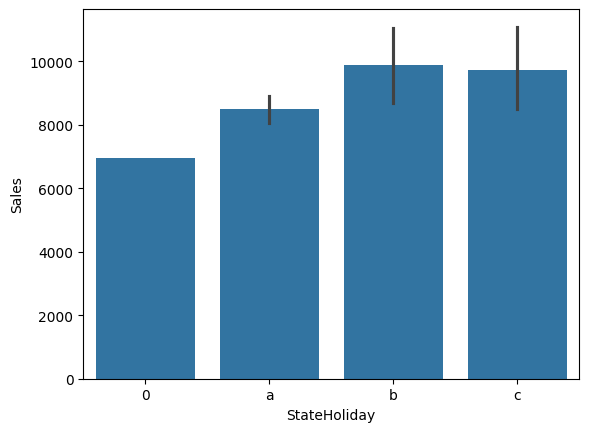

In [23]:
sns.barplot(data=merged_df, x='StateHoliday', y='Sales')

## Pre-processing & Feature Engineering

### Date

In [24]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Day'] = df['Date'].dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [25]:
split_date(merged_df)
split_date(merged_test_df)

In [26]:
merged_df.sample(10)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
740397    823          5 2013-09-06   4981        530     1      0   
23254     955          6 2015-07-11   4395        434     1      0   
359233    441          5 2014-08-22   6963        744     1      1   
229810    121          2 2015-01-06   5897        613     1      1   
641053    714          3 2013-12-04   5836        357     1      1   
187091    887          6 2015-02-14   6406        547     1      0   
999002    748          4 2013-01-17   4237        397     1      0   
151176    652          3 2015-03-18   6673        649     1      1   
658948    769          1 2013-11-18  11174       3066     1      1   
452827    923          4 2014-05-22   5202        734     1      1   

       StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
740397            0              0         a  ...                      11.0   
23254             0              0         d  ...                       7.0   
359233            0              0         d  ...                       NaN   
229810            0              0         a  ...                      11.0   
641053            0              0         d  ...                      10.0   
187091            0              0         d  ...                       NaN   
999002            0              0         d  ...                       3.0   
151176            0              0         a  ...                       NaN   
658948            0              0         b  ...                       NaN   
452827            0              0         a  ...                       9.0   

        CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
740397                    2010.0       0              NaN              NaN   
23254                     2009.0       1             36.0           2013.0   
359233                       NaN       0              NaN              NaN   
229810                    2009.0       1             36.0           2013.0   
641053                    2005.0       1             10.0           2013.0   
187091                       NaN       1             37.0           2009.0   
999002                    2010.0       1             14.0           2011.0   
151176                       NaN       0              NaN              NaN   
658948                       NaN       1             48.0           2012.0   
452827                    2008.0       0              NaN              NaN   

           PromoInterval  Year Month  Day  WeekOfYear  
740397               NaN  2013     9    6          36  
23254   Mar,Jun,Sept,Dec  2015     7   11          28  
359233               NaN  2014     8   22          34  
229810  Mar,Jun,Sept,Dec  2015     1    6           2  
641053   Jan,Apr,Jul,Oct  2013    12    4          49  
187091   Jan,Apr,Jul,Oct  2015     2   14           7  
999002   Jan,Apr,Jul,Oct  2013     1   17           3  
151176               NaN  2015     3   18          12  
658948   Jan,Apr,Jul,Oct  2013    11   18          47  
452827               NaN  2014     5   22          21  

[10 rows x 22 columns]

In [27]:
merged_test_df.sample(10)

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
15646  15647    310          7 2015-08-30   1.0      0            0   
15927  15928    673          7 2015-08-30   0.0      0            0   
25299  25300    618          3 2015-08-19   1.0      1            0   
26417  26418    951          2 2015-08-18   1.0      1            0   
41080  41081   1106          6 2015-08-01   1.0      0            0   
27906  27907    666          7 2015-08-16   0.0      0            0   
14266  14267    737          2 2015-09-01   1.0      1            0   
30976  30977    210          3 2015-08-12   1.0      0            0   
13760  13761     83          2 2015-09-01   1.0      1            0   
22977  22978    932          6 2015-08-22   1.0      0            0   

       SchoolHoliday StoreType Assortment  ...  CompetitionOpenSinceMonth  \
15646              0         a          c  ...                        NaN   
15927              0         d          c  ...                        NaN   
25299              1         d          c  ...                        NaN   
26417              0         d          c  ...                        NaN   
41080              0         a          c  ...                        9.0   
27906              0         c          c  ...                        NaN   
14266              0         a          a  ...                        5.0   
30976              1         d          a  ...                       11.0   
13760              0         a          a  ...                        NaN   
22977              0         a          a  ...                        NaN   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
15646                       NaN       1             10.0           2014.0   
15927                       NaN       1              5.0           2013.0   
25299                       NaN       0              NaN              NaN   
26417                       NaN       1             40.0           2011.0   
41080                    2011.0       1             31.0           2013.0   
27906                       NaN       1              9.0           2011.0   
14266                    2007.0       1             31.0           2013.0   
30976                    1999.0       1              5.0           2013.0   
13760                       NaN       0              NaN              NaN   
22977                       NaN       1             13.0           2010.0   

          PromoInterval  Year  Month  Day  WeekOfYear  
15646  Mar,Jun,Sept,Dec  2015      8   30          35  
15927   Feb,May,Aug,Nov  2015      8   30          35  
25299               NaN  2015      8   19          34  
26417   Jan,Apr,Jul,Oct  2015      8   18          34  
41080   Jan,Apr,Jul,Oct  2015      8    1          31  
27906  Mar,Jun,Sept,Dec  2015      8   16          33  
14266   Jan,Apr,Jul,Oct  2015      9    1          36  
30976   Feb,May,Aug,Nov  2015      8   12          33  
13760               NaN  2015      9    1          36  
22977   Jan,Apr,Jul,Oct  2015      8   22          34  

[10 rows x 21 columns]

### Store open/close

In [28]:
merged_df[merged_df['Open']==0].Sales.value_counts()

Series([], Name: count, dtype: int64)

In [29]:
merged_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0                  0              1         c  ...                       9.0   
1                  0              1         a  ...                      11.0   
2                  0              1         a  ...                      12.0   
3                  0              1         c  ...                       9.0   
4                  0              1         a  ...                       4.0   
...              ...            ...       ...  ...                       ...   
1016776            a              1         b  ...                       9.0   
1016827            a              1         b  ...                      10.0   
1016863            a              1         b  ...                       NaN   
1017042            a              1         b  ...                       NaN   
1017190            a              1         b  ...                       3.0   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                          2008.0       0              NaN              NaN   
1                          2007.0       1             13.0           2010.0   
2                          2006.0       1             14.0           2011.0   
3                          2009.0       0              NaN              NaN   
4                          2015.0       0              NaN              NaN   
...                           ...     ...              ...              ...   
1016776                    2006.0       0              NaN              NaN   
1016827                    1999.0       0              NaN              NaN   
1016863                       NaN       1             48.0           2012.0   
1017042                       NaN       0              NaN              NaN   
1017190                    2002.0       0              NaN              NaN   

           PromoInterval  Year Month  Day  WeekOfYear  
0                    NaN  2015     7   31          31  
1        Jan,Apr,Jul,Oct  2015     7   31          31  
2        Jan,Apr,Jul,Oct  2015     7   31          31  
3                    NaN  2015     7   31          31  
4                    NaN  2015     7   31          31  
...                  ...   ...   ...  ...         ...  
1016776              NaN  2013     1    1           1  
1016827              NaN  2013     1    1           1  
1016863  Jan,Apr,Jul,Oct  2013     1    1           1  
1017042              NaN  2013     1    1           1  
1017190              NaN  2013     1    1           1  

[844392 rows x 22 columns]

### Competition [month/year]

Here, we will calculate the number of months since the competition store is opened.

In [30]:
def comp_open(df):
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x<0 else x).fillna(0)

In [31]:
comp_open(merged_df)
comp_open(merged_test_df)

In [32]:
merged_df.sample(10)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
522061   1027          5 2014-03-21  12635       1659     1      1   
857700   1051          5 2013-05-24   8630       1100     1      0   
747254    990          6 2013-08-31   5293        530     1      0   
238372    151          1 2014-12-29   6644        698     1      0   
781613    784          3 2013-07-31  10870        977     1      1   
756020    836          5 2013-08-23   4374        605     1      0   
268706    643          4 2014-11-27  10400       1188     1      1   
138518    259          7 2015-03-29  16086       2630     1      0   
492432    388          3 2014-04-16  12415       1333     1      1   
304238    647          1 2014-10-20   6966        721     1      1   

       StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceYear  \
522061            0              0         a  ...                   2008.0   
857700            0              1         c  ...                   1998.0   
747254            0              0         d  ...                      NaN   
238372            0              1         d  ...                   2005.0   
781613            0              1         a  ...                   2014.0   
756020            0              1         a  ...                   2012.0   
268706            0              0         a  ...                   2010.0   
138518            0              0         b  ...                      NaN   
492432            0              1         a  ...                      NaN   
304238            0              1         a  ...                   2013.0   

        Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  \
522061       1             40.0           2011.0  Jan,Apr,Jul,Oct  2014   
857700       1              1.0           2012.0  Jan,Apr,Jul,Oct  2013   
747254       0              NaN              NaN              NaN  2013   
238372       0              NaN              NaN              NaN  2014   
781613       1             10.0           2014.0  Jan,Apr,Jul,Oct  2013   
756020       0              NaN              NaN              NaN  2013   
268706       1             18.0           2010.0  Feb,May,Aug,Nov  2014   
138518       0              NaN              NaN              NaN  2015   
492432       0              NaN              NaN              NaN  2014   
304238       0              NaN              NaN              NaN  2014   

        Month Day  WeekOfYear  CompetitionOpen  
522061      3  21          12             69.0  
857700      5  24          21            178.0  
747254      8  31          35              0.0  
238372     12  29           1            110.0  
781613      7  31          31              0.0  
756020      8  23          34             11.0  
268706     11  27          48             53.0  
138518      3  29          13              0.0  
492432      4  16          16              0.0  
304238     10  20          43             18.0  

[10 rows x 23 columns]

### Promotion

In [33]:
# def check_promo_month(row):
#   month2str = {
#       1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
#       7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
#   }

#   try:
#     months = (row['PromoInterval'] or '').split(',')
#     if row['Promo2Open'] and month2str[row['Month']] in months:
#       return 1
#     else:
#       return 0
#   except Exception:
#     return 0

# def promo_cols(df):
#   # Months since Promo2 was Open
#   df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
#   df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

#   # Whether a new round of promotions was started in the current month
#   df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

def promo_cols(df):
    # Months since Promo2 was Open
    df['Promo2Open'] = 12 * (df['Year'] - df['Promo2SinceYear']) +  (df['WeekOfYear'] - df['Promo2SinceWeek']) * 7 / 30.5
    df['Promo2Open'] = df['Promo2Open'].fillna(0)  # Fill NaN values with 0
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x) * df['Promo2']

    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

def check_promo_month(row):
    month2str = {
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    }

    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0


In [34]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [35]:
# merged_df.sample(10)
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)
# if the months from 'PromoInterval' will be the same as the month in the 'Date' column, then it will have 1 in 'IsPromo2Month' column

Date  Promo2  Promo2SinceYear  Promo2SinceWeek     PromoInterval  \
741964 2013-09-04       0              NaN              NaN               NaN   
865812 2013-05-16       1           2013.0              5.0   Feb,May,Aug,Nov   
818712 2013-06-28       1           2013.0             27.0   Jan,Apr,Jul,Oct   
780770 2013-08-01       1           2012.0             40.0   Jan,Apr,Jul,Oct   
837737 2013-06-10       1           2009.0             37.0   Jan,Apr,Jul,Oct   
257199 2014-12-09       1           2013.0             31.0  Mar,Jun,Sept,Dec   
663988 2013-11-13       0              NaN              NaN               NaN   
440582 2014-06-02       0              NaN              NaN               NaN   
514251 2014-03-28       0              NaN              NaN               NaN   
962505 2013-02-19       0              NaN              NaN               NaN   
789043 2013-07-24       1           2013.0              1.0   Jan,Apr,Jul,Oct   
927060 2013-03-22       1           2013.0             31.0   Jan,Apr,Jul,Oct   
368711 2014-08-12       0              NaN              NaN               NaN   
580257 2014-01-27       1           2013.0              1.0   Jan,Apr,Jul,Oct   
388240 2014-07-22       0              NaN              NaN               NaN   
928748 2013-03-21       1           2011.0             22.0   Jan,Apr,Jul,Oct   
604235 2014-01-06       1           2009.0             37.0   Jan,Apr,Jul,Oct   
563187 2014-02-12       0              NaN              NaN               NaN   
610794 2013-12-31       0              NaN              NaN               NaN   
705854 2013-10-07       1           2011.0             14.0   Jan,Apr,Jul,Oct   

        Promo2Open  IsPromo2Month  
741964    0.000000              0  
865812    3.442623              1  
818712    0.000000              0  
780770    9.934426              0  
837737   45.016393              0  
257199   16.360656              1  
663988    0.000000              0  
440582    0.000000              0  
514251    0.000000              0  
962505    0.000000              0  
789043    6.655738              1  
927060    0.000000              0  
368711    0.000000              0  
580257   12.918033              1  
388240    0.000000              0  
928748   21.704918              0  
604235   51.967213              1  
563187    0.000000              0  
610794    0.000000              0  
705854   30.196721              1

### Input and Output target columns

In [36]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [37]:
target_col = 'Sales'
input_cols = ['Store', 'DayOfWeek', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']

In [38]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [39]:
test_inputs = merged_test_df[input_cols].copy()

In [40]:
numerical_cols = ['Store', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'Year', 'Month', 'Day',
       'CompetitionOpen', 'Promo2Open', 'IsPromo2Month']
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment', 'DayOfWeek']

In [41]:
inputs[numerical_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
Promo2                    0
Year                      0
Month                     0
Day                       0
CompetitionOpen           0
Promo2Open                0
IsPromo2Month             0
dtype: int64

In [42]:
test_inputs[numerical_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
Promo2                  0
Year                    0
Month                   0
Day                     0
CompetitionOpen         0
Promo2Open              0
IsPromo2Month           0
dtype: int64

In [43]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [44]:
inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)

### Scale Numeric Values (in range [0,1])

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler().fit(inputs[numerical_cols])

In [47]:
inputs[numerical_cols] = scaler.transform(inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

### Encode Categorical Columns

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [50]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [51]:
X = inputs[numerical_cols+encoded_cols]
X_test = test_inputs[numerical_cols+encoded_cols]

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)

> In simple terms, we are training more trees to correct errors from previous trees.



### Training

To train a GBM, we use `XGBRegressor` from `XGBoost`

In [52]:
from xgboost import XGBRegressor

In [53]:
model = XGBRegressor(n_estimators=20, random_state=42, n_jobs=-1, max_depth=4)

In [54]:
%%time
model.fit(X, targets)

CPU times: user 5.39 s, sys: 190 ms, total: 5.58 s
Wall time: 3.13 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

### Prediction

In [55]:
preds = model.predict(X)
preds

array([8002.9546, 7347.649 , 8376.886 , ..., 7649.0835, 7664.0796,
       9644.286 ], dtype=float32)

### Evaluation

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
def rmse(a,b):
  return mean_squared_error(a, b, squared=False)

In [58]:
rmse(preds, targets)

2364.106695971708

### Visualization

In [59]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 30

<Axes: >

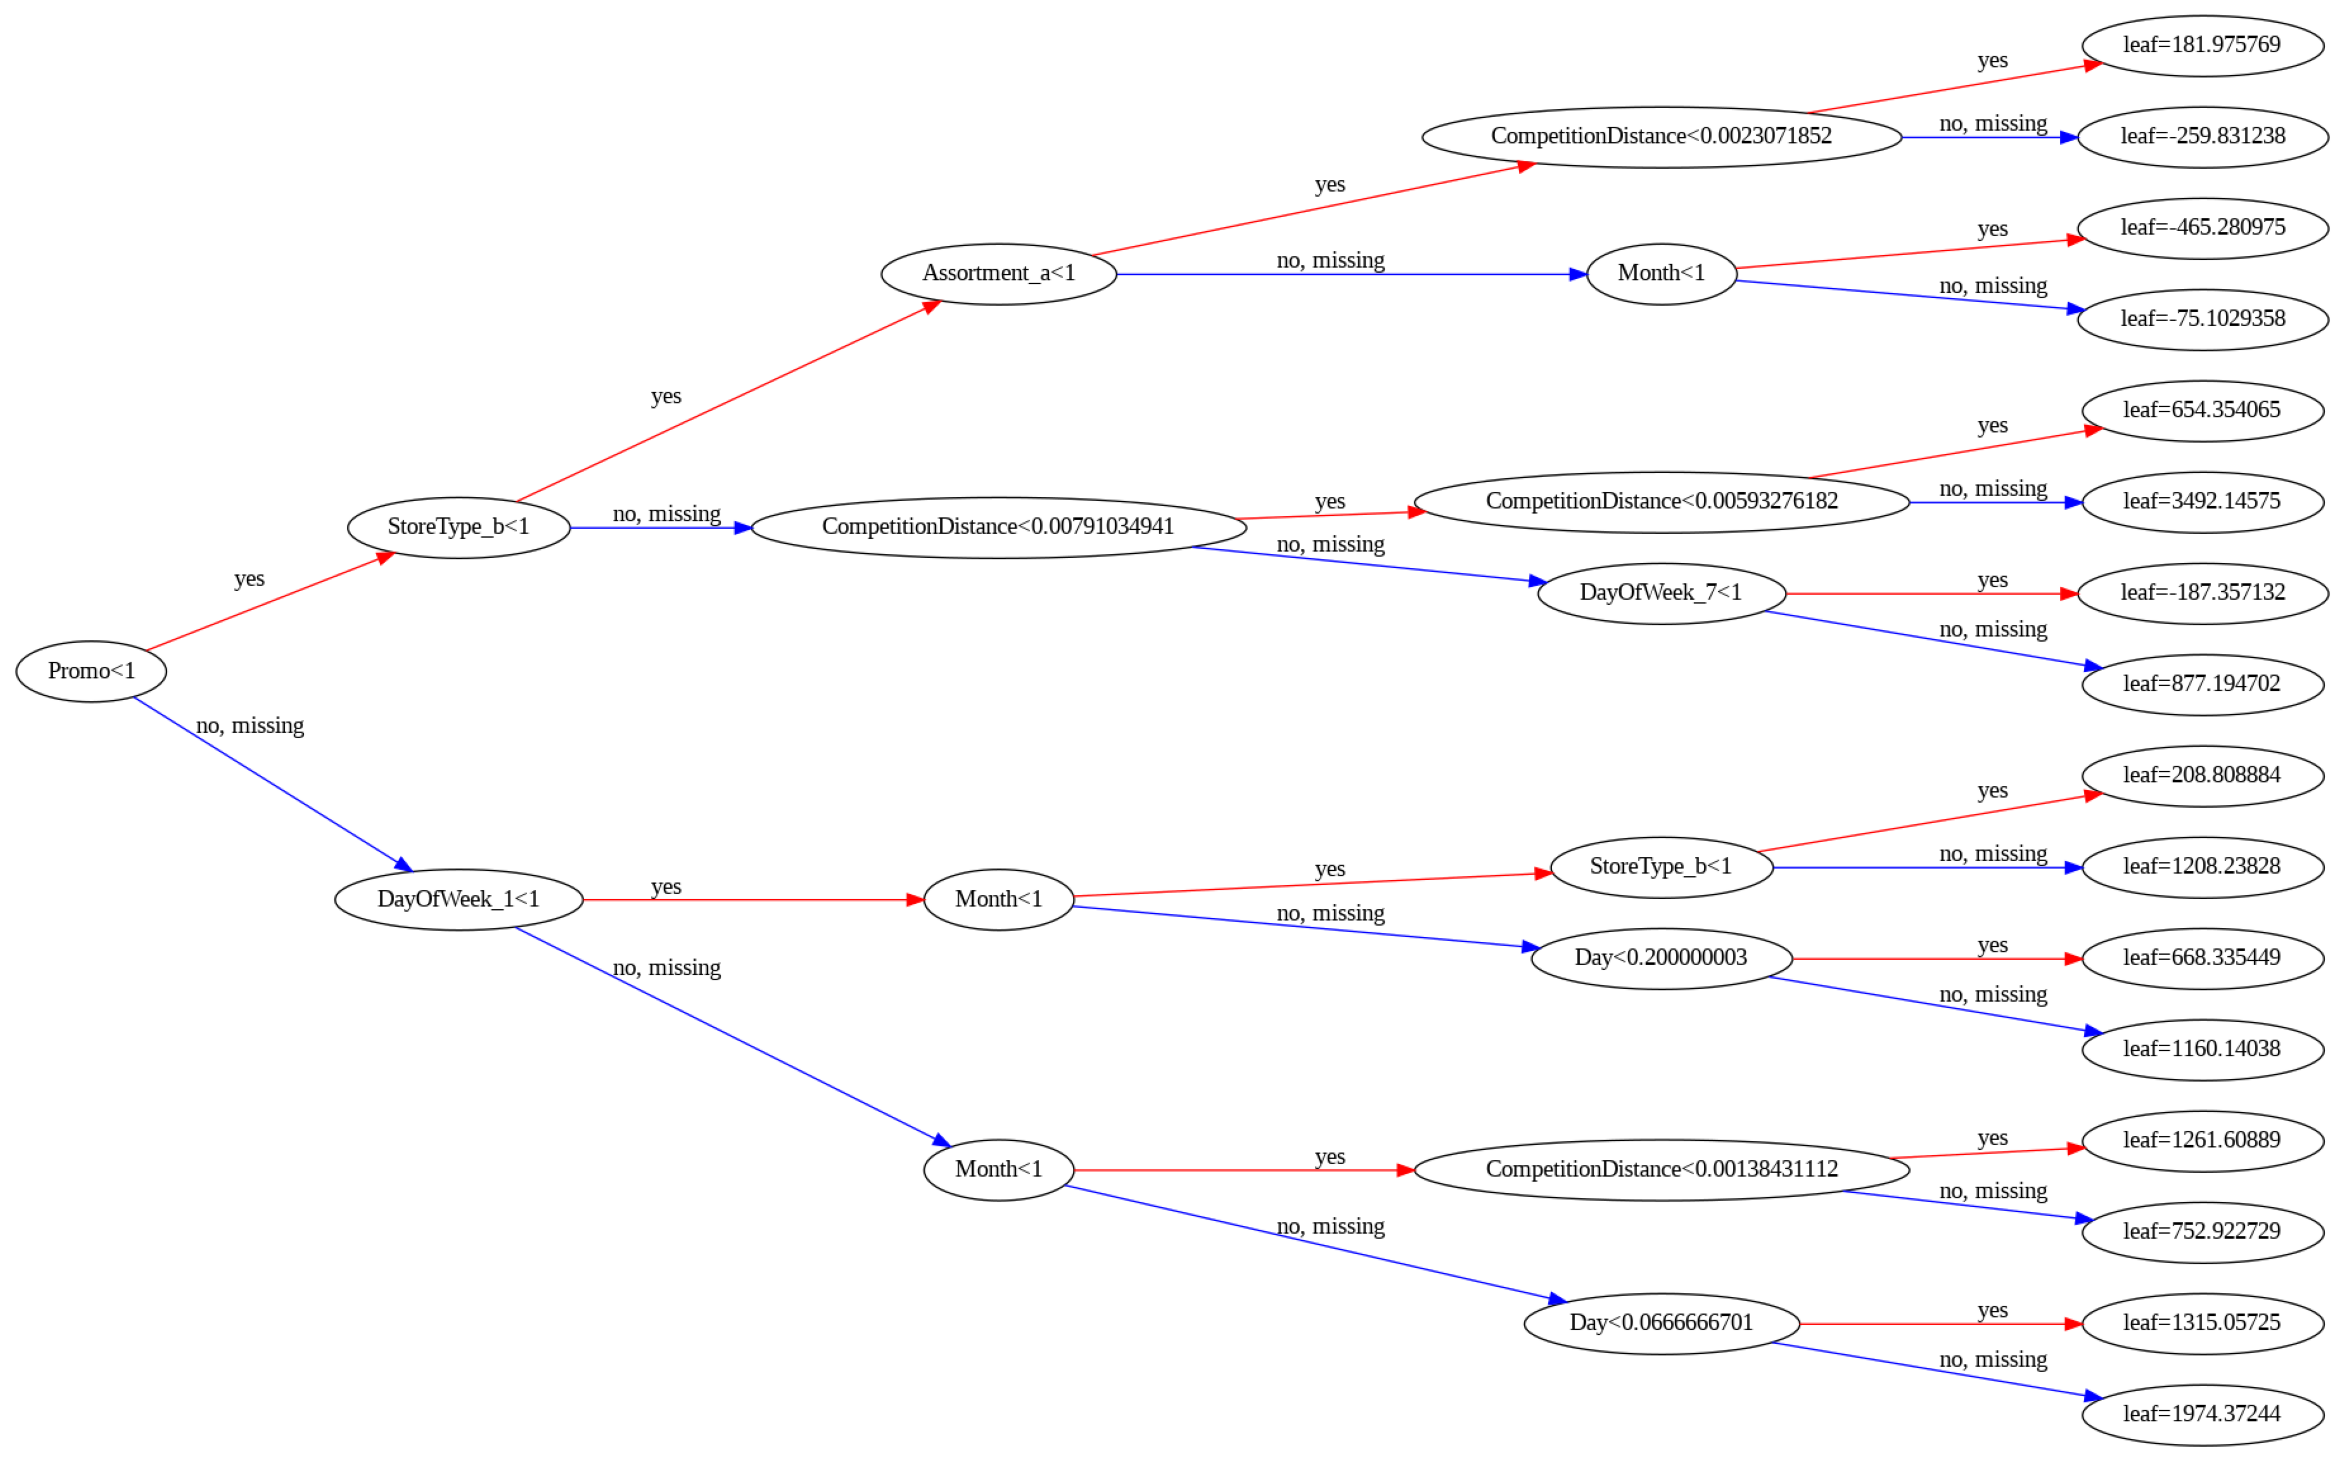

In [60]:
plot_tree(model, rankdir='LR', num_trees=0)

<Axes: >

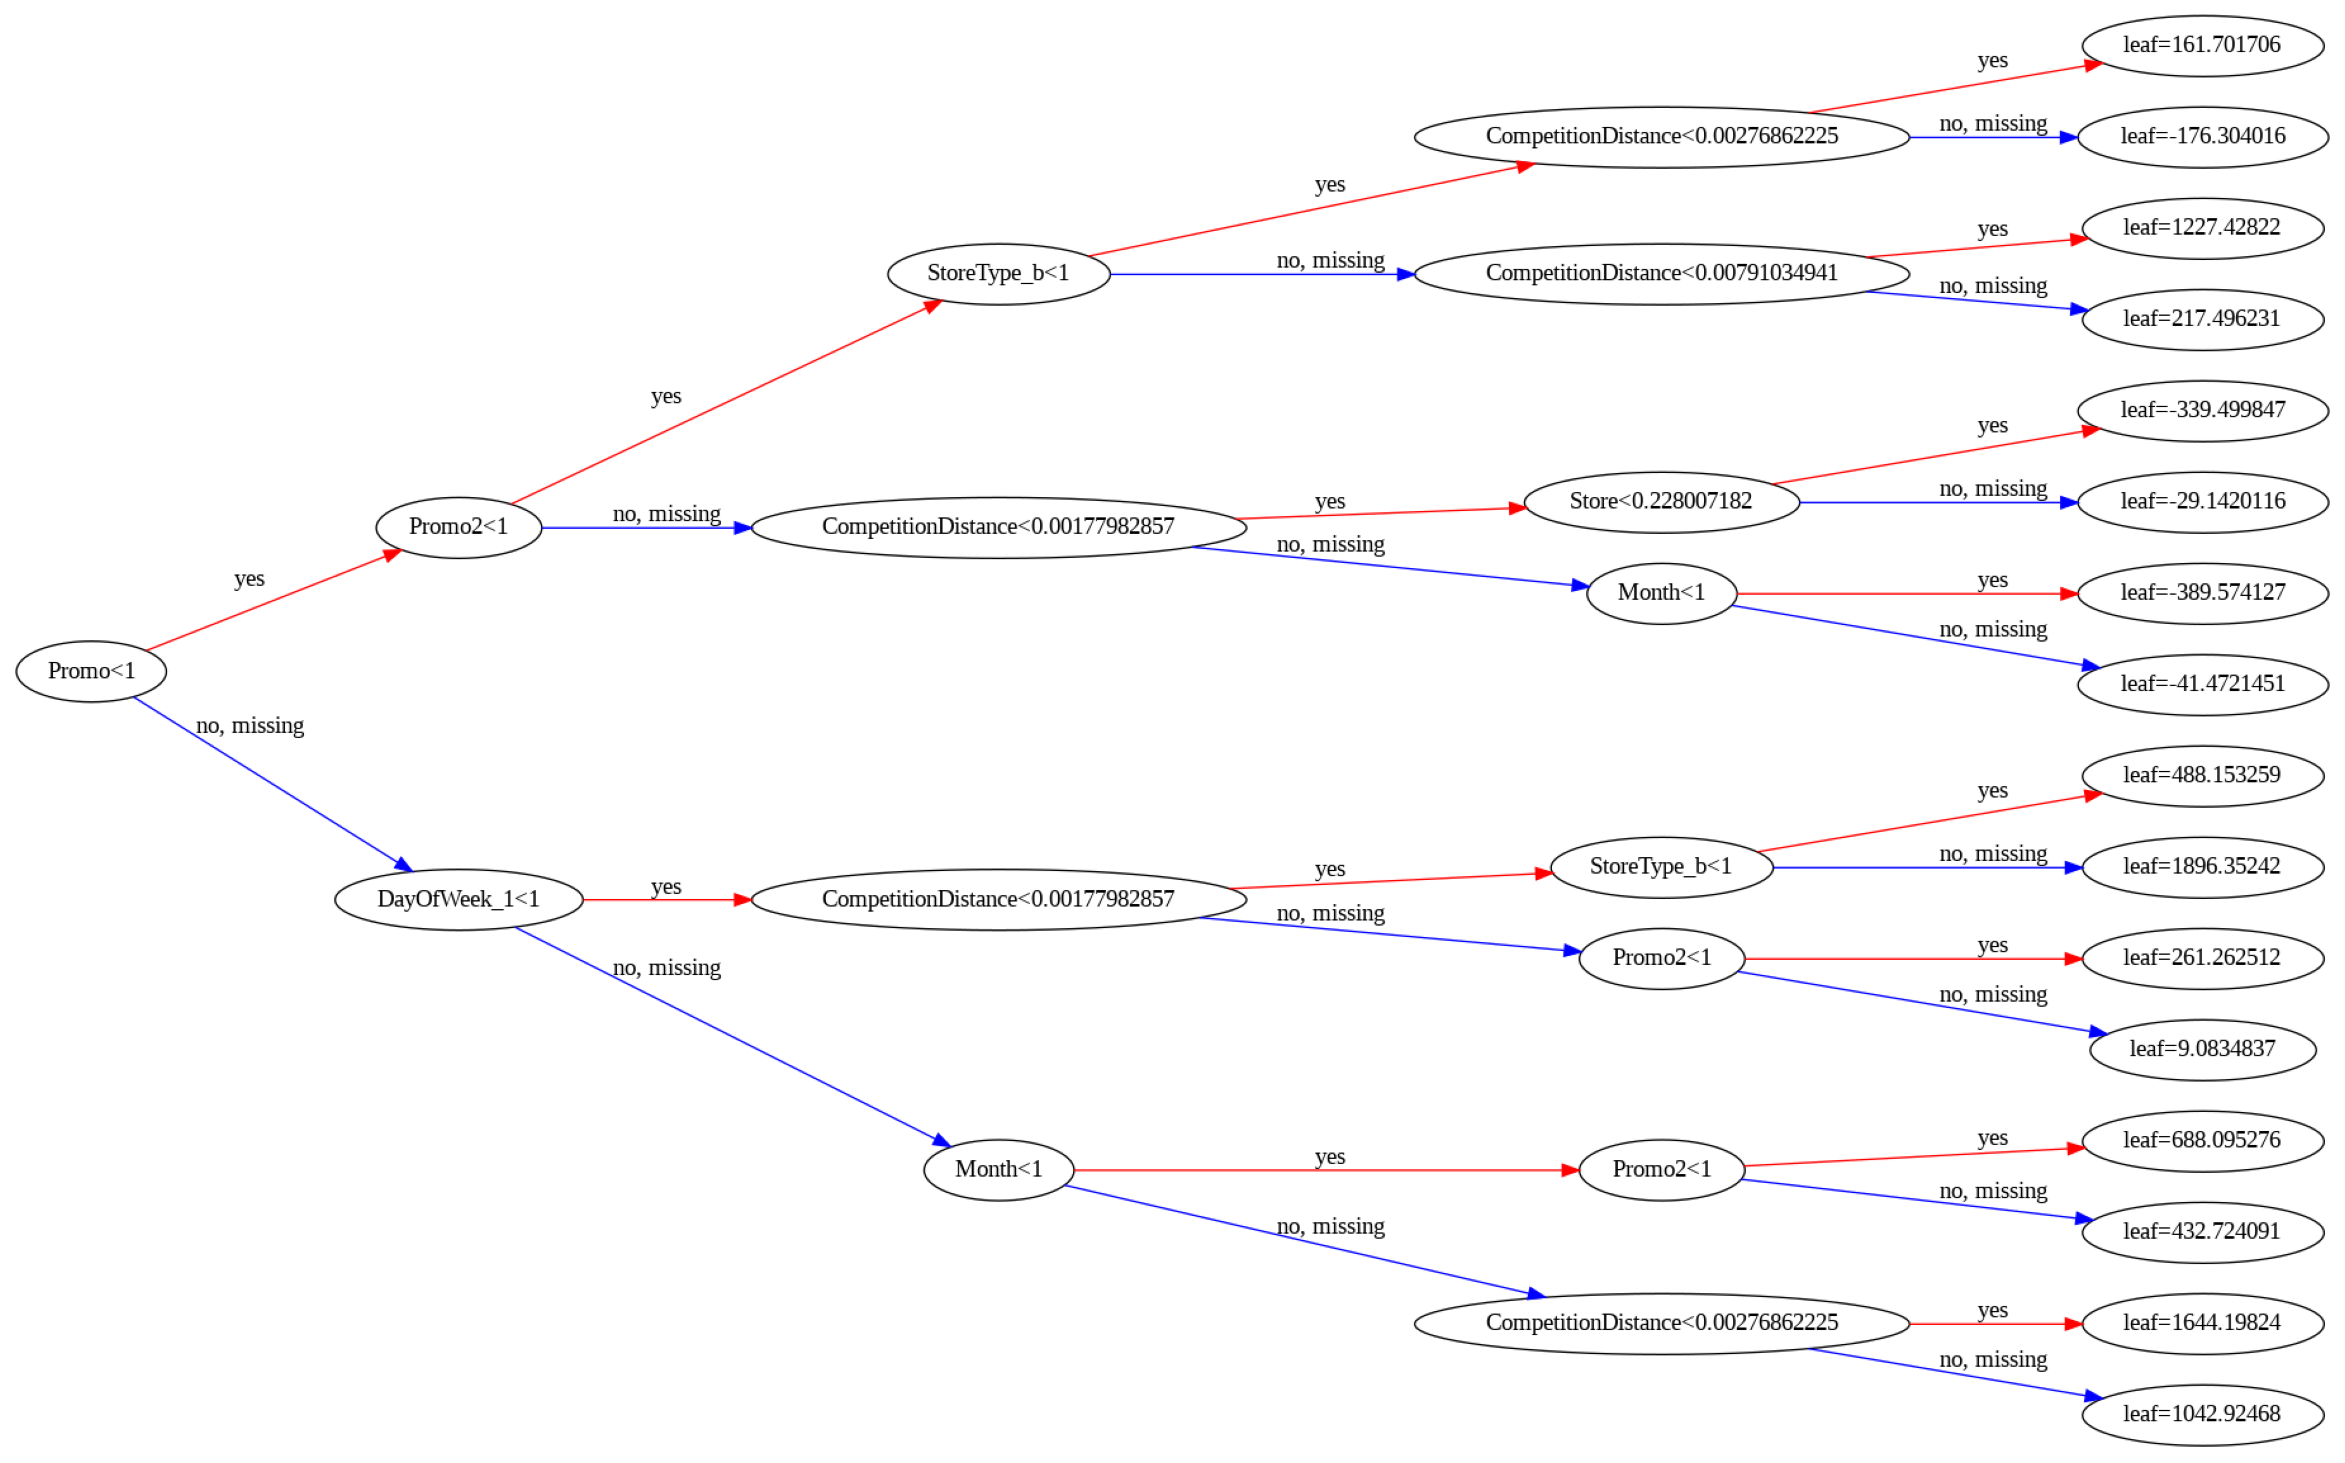

In [61]:
plot_tree(model, rankdir='LR', num_trees=1)

<Axes: >

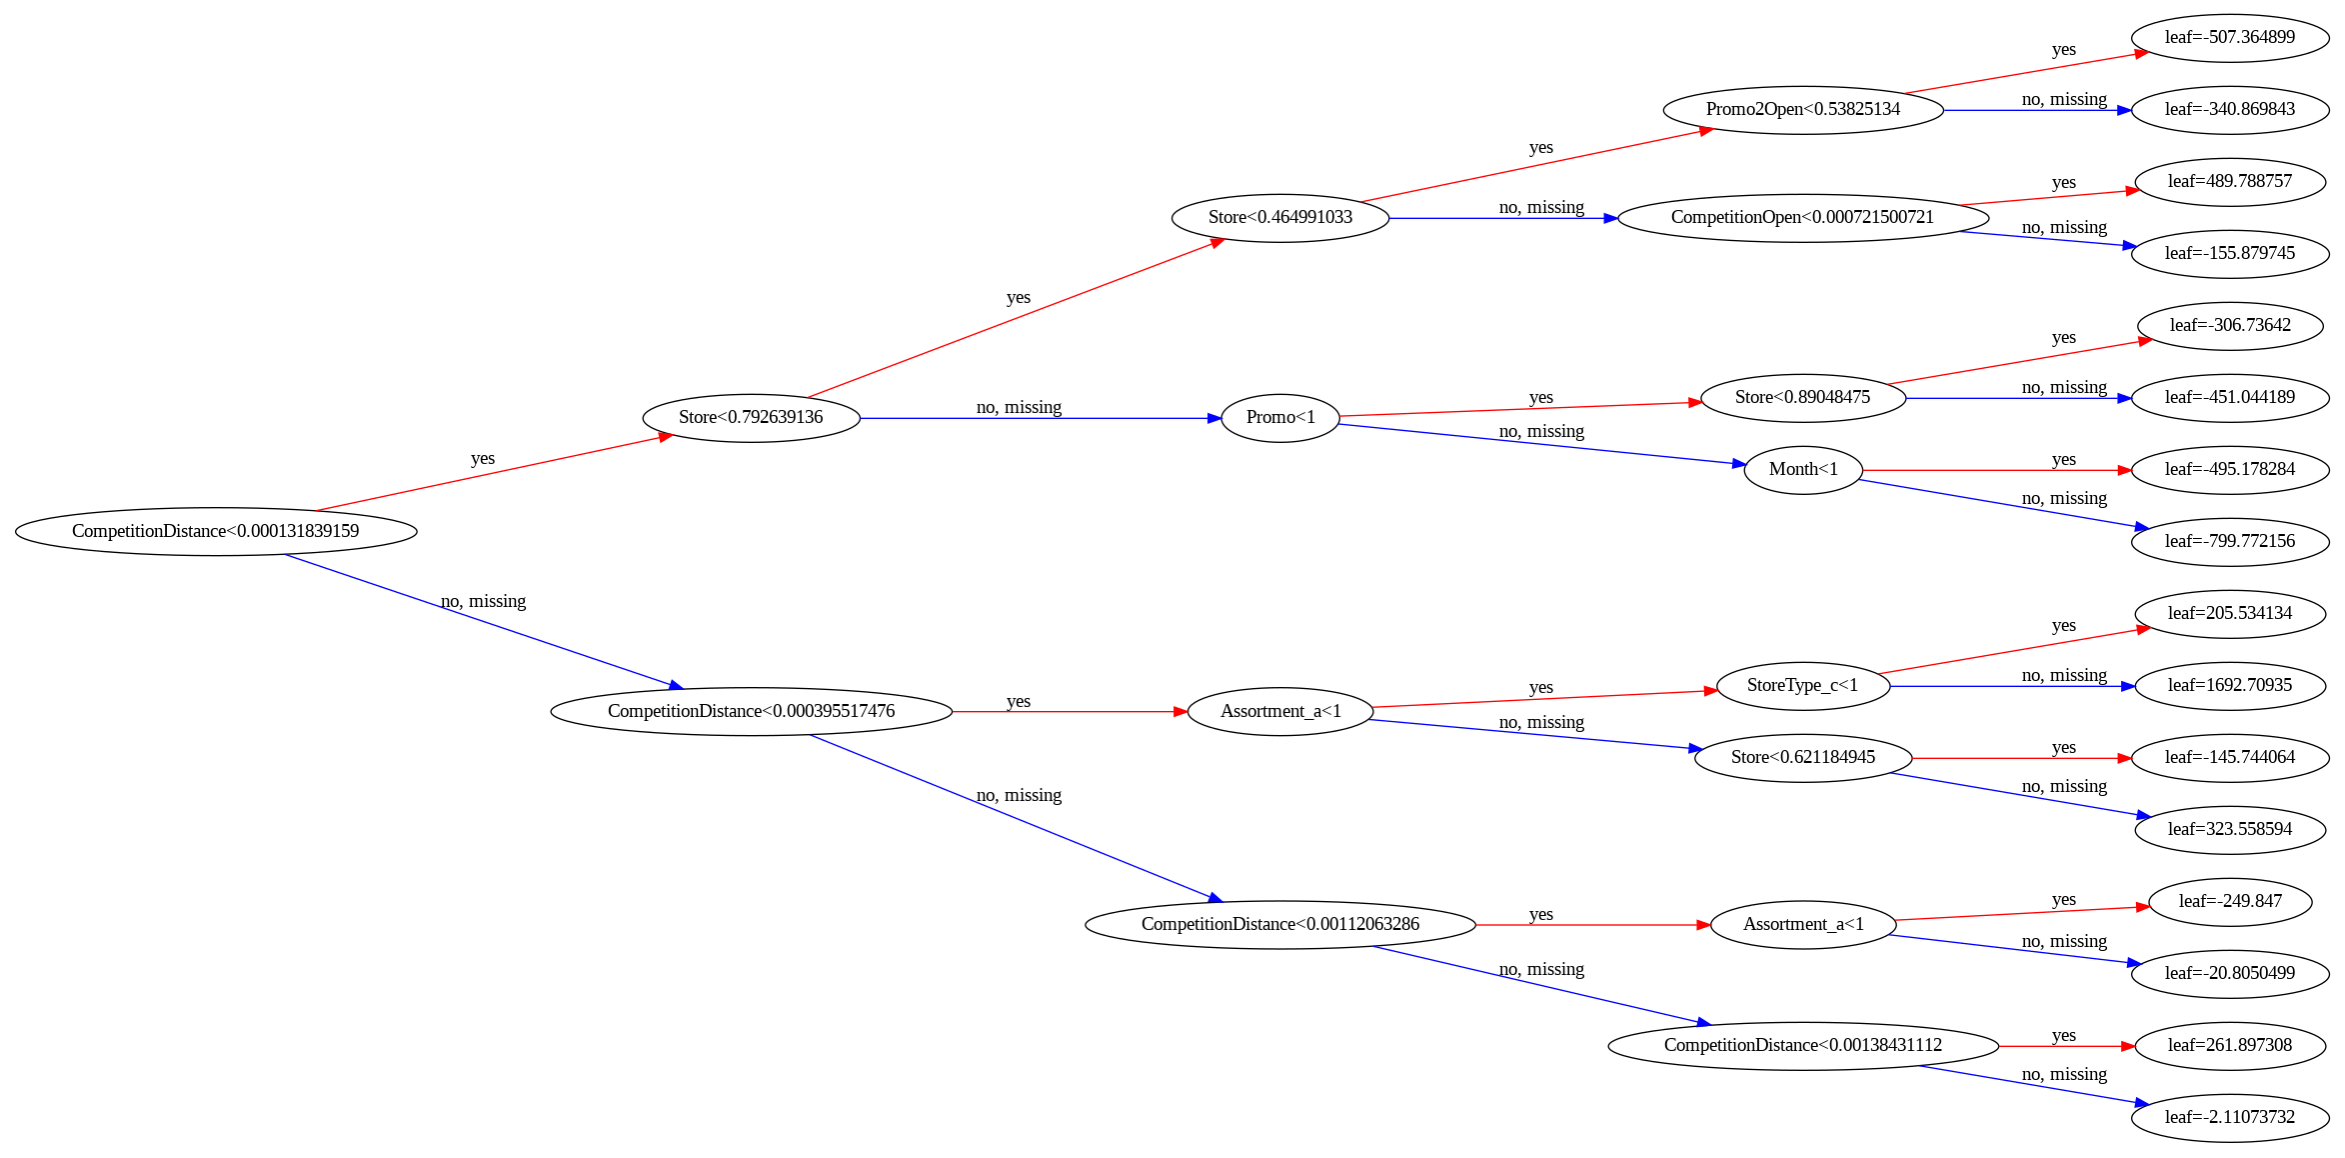

In [62]:
plot_tree(model, rankdir='LR', num_trees=19)

In [63]:
trees = model.get_booster().get_dump()

In [64]:
len(trees)

20

### Feature Importance

In [65]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [66]:
importance_df.head(10)

feature  importance
1                 Promo    0.339391
22          DayOfWeek_1    0.122426
16          StoreType_b    0.069168
4                Promo2    0.049514
3   CompetitionDistance    0.045622
19         Assortment_a    0.041297
8       CompetitionOpen    0.038872
17          StoreType_c    0.037024
2         SchoolHoliday    0.035819
6                 Month    0.029064

<Axes: title={'center': 'Importance vs Feature'}, xlabel='importance', ylabel='feature'>

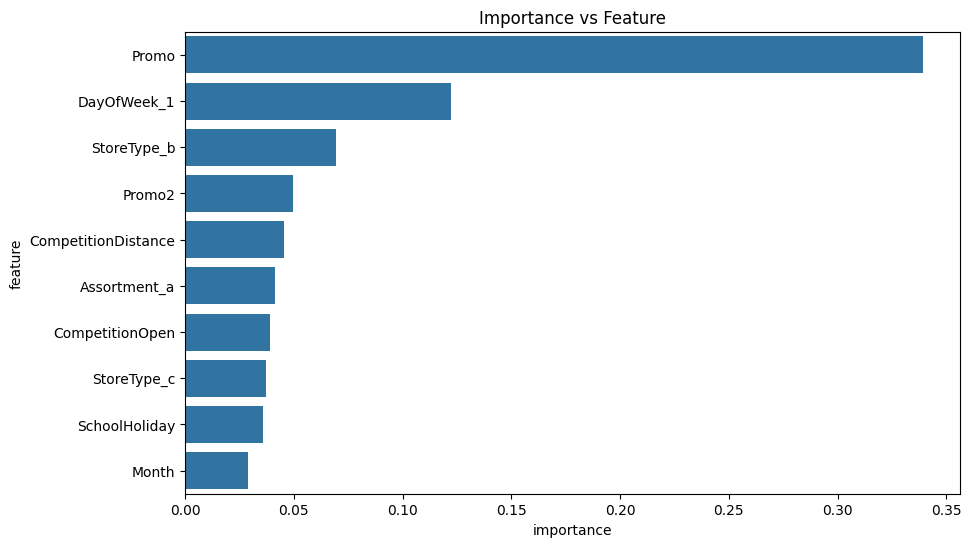

In [67]:
plt.figure(figsize=(10, 6))
plt.title("Importance vs Feature")
sns.barplot(data=importance_df.head(10), x='importance', y='feature')

## K Fold Cross Validation

In [68]:
from sklearn.model_selection import KFold

In [69]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [70]:
kfold = KFold(n_splits=5)

In [71]:
models = []

for train_index, val_index in kfold.split(X):
  X_train, train_targets = X.iloc[train_index], targets.iloc[train_index]
  X_val, val_targets = X.iloc[val_index], targets.iloc[val_index]

  model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, max_depth=4, n_estimators=20)
  models.append(model)

  print("Train RMSE: {}, Validation RMSE: {} ".format(train_rmse, val_rmse))

Train RMSE: 2361.7752491820993, Validation RMSE: 2422.7755546414483 
Train RMSE: 2404.548895136297, Validation RMSE: 2456.3416637236883 
Train RMSE: 2391.906076465945, Validation RMSE: 2365.5324196031424 
Train RMSE: 2330.5426489872393, Validation RMSE: 2438.7703680441896 
Train RMSE: 2338.9412703591624, Validation RMSE: 2408.6042318193163 


In [72]:
def predict_avg(models, inputs):
  return np.mean([model.predict(inputs) for model in models], axis=0)

In [73]:
preds = predict_avg(models, X)
preds

array([7964.9897, 7651.0103, 8514.868 , ..., 7809.503 , 7465.2407,
       9710.337 ], dtype=float32)

## Hyperparameter Tuning and Regularization

In [74]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [75]:
def test_param_kfold(n_splits, **params):
  train_rmse, val_rmse, models = [],[],[]
  kfold = KFold(n_splits=n_splits)
  for train_index, val_index in kfold.split(X):
    X_train, train_targets = X.iloc[train_index], targets.iloc[train_index]
    X_val, val_targets = X.iloc[val_index], targets.iloc[val_index]

    model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
    models.append(model)
    train_rmse.append(train_rmse)
    val_rmse.append(val_rmse)

    print("Train RMSE: {}, Validation RMSE: {} ".format(np.mean(train_rmse), np.mean(val_rmse)))
    return models

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [78]:
def test_params(**params):
  model = XGBRegressor(random_state=42, n_jobs=-1, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  print("Train RMSE: {}, Validation RMSE: {}".format(train_rmse, val_rmse))

`n_estimators`

The number of trees to be created. More trees = greater capacity of the model.

In [79]:
test_params(n_estimators=10)

Train RMSE: 2333.749488522376, Validation RMSE: 2331.1992115085995


In [80]:
test_params(n_estimators=30)

Train RMSE: 1836.098576876647, Validation RMSE: 1832.8564837006852


In [81]:
test_params(n_estimators=100)

Train RMSE: 1179.1972646652496, Validation RMSE: 1179.1575072791104


In [82]:
test_params(n_estimators=240)

Train RMSE: 901.0661868301786, Validation RMSE: 912.4938840996474


In [83]:
test_params(n_estimators=300)

Train RMSE: 858.6081887592823, Validation RMSE: 874.2202755995683


In [84]:
test_params(n_estimators=400)

Train RMSE: 804.3349354759762, Validation RMSE: 827.0840830115833


`max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [85]:
test_params(max_depth=2)

Train RMSE: 2402.1202470474495, Validation RMSE: 2393.343934563509


In [86]:
test_params(max_depth=5)

Train RMSE: 1429.5022931312217, Validation RMSE: 1424.5442312430785


In [87]:
test_params(max_depth=10)

Train RMSE: 670.0865132320987, Validation RMSE: 767.3579854165883


`learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [88]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 2788.62454040419, Validation RMSE: 2791.437399677579


In [89]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 2183.7172079133547, Validation RMSE: 2183.3589832904895


In [90]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 1539.2029416924165, Validation RMSE: 1538.893175907458


In [91]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 1151.410749499334, Validation RMSE: 1160.1741451529913


In [92]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 1123.9855894709506, Validation RMSE: 1134.0492279396817


In [93]:
test_params(max_depth=5, n_estimators=50, learning_rate=0.8) # imp params for XGBoost -> max_depth, n_estimators, learning_rate

Train RMSE: 1353.723657541398, Validation RMSE: 1350.9576144313476


`booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [94]:
test_params(booster='gblinear')

Train RMSE: 2727.9352670572785, Validation RMSE: 2724.926149232667


Clearly, the linear model is not well suited for this data.

## Putting it all togeather and Making Predictions

In [95]:
model = XGBRegressor(n_jobs=-1, max_depth=10, n_estimators=1000, random_state=42, learning_rate=0.2, subsample=0.9, colsample_bytree=0.7)

In [96]:
%%time
model.fit(X, targets)

CPU times: user 4min 26s, sys: 703 ms, total: 4min 26s
Wall time: 2min 55s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [98]:
test_preds = model.predict(X_test)

In [99]:
test_preds

array([ 4342.836 ,  7589.332 ,  9344.172 , ...,  5006.0767, 23198.422 ,
        6954.097 ], dtype=float32)

In [101]:
submission_df['Sales'] = test_preds

In [102]:
submission_df

Id         Sales
0          1   4342.835938
1          2   7589.332031
2          3   9344.171875
3          4   7206.702637
4          5   7359.719727
...      ...           ...
41083  41084   3023.122559
41084  41085   6225.951172
41085  41086   5006.076660
41086  41087  23198.421875
41087  41088   6954.097168

[41088 rows x 2 columns]

If the store is not open, then the Sales must be 0.

In [103]:
test_df.Open.isna().sum()

11

In [104]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [105]:
submission_df

Id         Sales
0          1   4342.835938
1          2   7589.332031
2          3   9344.171875
3          4   7206.702637
4          5   7359.719727
...      ...           ...
41083  41084   3023.122559
41084  41085   6225.951172
41085  41086   5006.076660
41086  41087  23198.421875
41087  41088   6954.097168

[41088 rows x 2 columns]

In [106]:
submission_df.to_csv('submission.csv', index=False)

## Saving the model

In [107]:
import joblib

In [108]:
ross_joblib_df = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'inputs': inputs,
    'targets': targets,
    'test_inputs': test_inputs,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
    'input_cols': input_cols,
    'target_col': target_col
}

In [109]:
joblib.dump(ross_joblib_df, 'ross_joblib_df.joblib')

['ross_joblib_df.joblib']

In [110]:
ross_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
...              ...            ...  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1  

[1017209 rows x 9 columns]

In [129]:
sample_input = {
    'Store': 2,
    'DayOfWeek': 4,
    'Date': '2015-09-30',
    'Promo': 1,
    'StateHoliday': 'a',
    'SchoolHoliday': 0,
}

In [130]:
input_df = pd.DataFrame([sample_input])
input_df

Store  DayOfWeek        Date  Promo StateHoliday  SchoolHoliday
0      2          4  2015-09-30      1            a              0

In [131]:
input_merged_df = input_df.merge(store_df, on='Store')
input_merged_df

Store  DayOfWeek        Date  Promo StateHoliday  SchoolHoliday StoreType  \
0      2          4  2015-09-30      1            a              0         a   

  Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0          a                570.0                       11.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2007.0       1             13.0           2010.0   

     PromoInterval  
0  Jan,Apr,Jul,Oct

In [132]:
# Feature engineering
# Date
split_date(input_merged_df)
# Competition
comp_open(input_merged_df)
# Promo
promo_cols(input_merged_df)
input_merged_df

Store  DayOfWeek       Date  Promo StateHoliday  SchoolHoliday StoreType  \
0      2          4 2015-09-30      1            a              0         a   

  Assortment  CompetitionDistance  CompetitionOpenSinceMonth  ...  \
0          a                570.0                       11.0  ...   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year Month  Day  \
0             13.0           2010.0  Jan,Apr,Jul,Oct  2015     9   30   

   WeekOfYear  CompetitionOpen  Promo2Open  IsPromo2Month  
0          40             94.0   66.196721              0  

[1 rows x 22 columns]

In [133]:
# Preprocessing
# Fill missing values

# Scaling - not required here

# Imputing
input_merged_df[numerical_cols] = scaler.transform(input_merged_df[numerical_cols])
# Encoding
input_merged_df[encoded_cols] = encoder.transform(input_merged_df[categorical_cols])

In [134]:
# Select the right set of columns (numerical+encoded)
X_input = input_merged_df[numerical_cols+encoded_cols]
# pass it into the model
model.predict(X_input)

array([8371.935], dtype=float32)